In [1]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [2]:
#install a Python-accessible MondoDB package (use conda install in terminal if fails)

!pip install pymongo

In [1]:
import pymongo
from pymongo import MongoClient

In [2]:
client = MongoClient('localhost', 27017)

# launch the accessible read/write area in Terminal via:
# mongod --dbpath /usr/local/mongodb-data

In [3]:
# following tutorial at:
# https://realpython.com/introduction-to-mongodb-and-python/#using-mongodb-with-python-and-pymongo

db = client['rptutorials']

db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'rptutorials')

In [10]:
#clear the database if running for the second time
tutorial.delete_many({})

tutorial1 = {
     "title": "Working With JSON Data in Python",
     "author": "Lucas",
     "contributors": [
         "Aldren",
         "Dan",
         "Joanna"
     ],
     "url": "https://realpython.com/python-json/"
}

In [11]:
tutorial = db.tutorial
tutorial

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'rptutorials'), 'tutorial')

In [12]:
result = tutorial.insert_one(tutorial1)
result

In [13]:
tutorial2 = {
     "title": "Python's Requests Library (Guide)",
     "author": "Alex",
     "contributors": [
         "Aldren",
         "Brad",
         "Joanna"
     ],
     "url": "https://realpython.com/python-requests/"
}

tutorial3 = {
     "title": "Object-Oriented Programming (OOP) in Python 3",
     "author": "David",
     "contributors": [
         "Aldren",
         "Joanna",
         "Jacob"
     ],
     "url": "https://realpython.com/python3-object-oriented-programming/"
}

In [14]:
new_result = tutorial.insert_many([tutorial2, tutorial3])

print(f"Multiple tutorials: {new_result.inserted_ids}")

Multiple tutorials: [ObjectId('64e4c8941c00963b085c39ba'), ObjectId('64e4c8941c00963b085c39bb')]


In [15]:
import pprint

for doc in tutorial.find():
    pprint.pprint(doc)

{'_id': ObjectId('64e4c88e1c00963b085c39b9'),
 'author': 'Lucas',
 'contributors': ['Aldren', 'Dan', 'Joanna'],
 'title': 'Working With JSON Data in Python',
 'url': 'https://realpython.com/python-json/'}
{'_id': ObjectId('64e4c8941c00963b085c39ba'),
 'author': 'Alex',
 'contributors': ['Aldren', 'Brad', 'Joanna'],
 'title': "Python's Requests Library (Guide)",
 'url': 'https://realpython.com/python-requests/'}
{'_id': ObjectId('64e4c8941c00963b085c39bb'),
 'author': 'David',
 'contributors': ['Aldren', 'Joanna', 'Jacob'],
 'title': 'Object-Oriented Programming (OOP) in Python 3',
 'url': 'https://realpython.com/python3-object-oriented-programming/'}


In [16]:
jon_tutorial = tutorial.find_one({"author": "Alex"})
pprint.pprint(jon_tutorial)

{'_id': ObjectId('64e4c8941c00963b085c39ba'),
 'author': 'Alex',
 'contributors': ['Aldren', 'Brad', 'Joanna'],
 'title': "Python's Requests Library (Guide)",
 'url': 'https://realpython.com/python-requests/'}


In [5]:
# example of inserting data to MondoDB from csv file

import pandas as pd
import json
import time

def mongoimport(csv_path, db_name, coll_name, db_url='localhost', db_port=27017):
    """ Imports a csv file at path csv_name to a mongo colection
    returns: count of the documants in the new collection
    """
    client = MongoClient(db_url, db_port)
    db = client[db_name]
    coll = db[coll_name]
    data = pd.read_csv(csv_path)
    payload = json.loads(data.to_json(orient='records'))
    coll.remove()
    coll.insert(payload)
    return coll.count()

db = client['zillo']

z_data = db.z_data
z_data

current_time_millis = int(round(time.time() * 1000))

mongoimport("Zillow_Mortgages_county_2016-2017.csv", "zillo", "z_data")

print('elapsed time: ', (int(round(time.time() * 1000))-current_time_millis))

/var/folders/zf/49prmn_s7s5861rytkmr3_080000gn/T/ipykernel_88839/4274216664.py:16: DeprecationWarning: remove is deprecated. Use delete_one or delete_many instead.
  coll.remove()
/var/folders/zf/49prmn_s7s5861rytkmr3_080000gn/T/ipykernel_88839/4274216664.py:17: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  coll.insert(payload)


elapsed time:  11300


/var/folders/zf/49prmn_s7s5861rytkmr3_080000gn/T/ipykernel_88839/4274216664.py:18: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  return coll.count()


In [18]:
result = z_data.find_one({"DaysOnZillow_AllHomes": 139.5})
pprint.pprint(result)

{'Date': '2017-03-31',
 'DaysOnZillow_AllHomes': 139.5,
 'InventoryRaw_AllHomes': 2034.0,
 'InventorySeasonallyAdjusted_AllHomes': 1859.0,
 'MedianListingPricePerSqft_1Bedroom': 477.6984262744,
 'MedianListingPricePerSqft_2Bedroom': 444.249260355,
 'MedianListingPricePerSqft_3Bedroom': 475.7844474761,
 'MedianListingPricePerSqft_4Bedroom': 575.4171536341,
 'MedianListingPricePerSqft_5BedroomOrMore': 699.9967549451,
 'MedianListingPricePerSqft_AllHomes': 492.3798358734,
 'MedianListingPricePerSqft_CondoCoop': None,
 'MedianListingPricePerSqft_DuplexTriplex': None,
 'MedianListingPricePerSqft_SingleFamilyResidence': 492.5765655506,
 'MedianListingPrice_1Bedroom': 321000.0,
 'MedianListingPrice_2Bedroom': 479000.0,
 'MedianListingPrice_3Bedroom': 798500.0,
 'MedianListingPrice_4Bedroom': 1495000.0,
 'MedianListingPrice_5BedroomOrMore': 2700000.0,
 'MedianListingPrice_AllHomes': 669000.0,
 'MedianListingPrice_CondoCoop': 479000.0,
 'MedianListingPrice_DuplexTriplex': None,
 'MedianListingP

In [7]:
#see Python matplotlib examples at: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

import matplotlib.pyplot as plt

data = []
amt = []

#get results for number of days greater than 150 days across all regions
result = z_data.find({'DaysOnZillow_AllHomes': {"$gt": 150}}, 
                     {'Date': 1, 'DaysOnZillow_AllHomes': 1}).sort('DaysOnZillow_AllHomes')

pprint.pprint(result)

#take dictionary result and build arrays for plotting
for doc in result:
    data.append(doc['Date'])
    amt.append(doc['DaysOnZillow_AllHomes'])
    
plt.xticks(rotation=90)

plt.plot(data, amt, 'ob', markersize=2)

Matplotlib created a temporary config/cache directory at /var/folders/zf/49prmn_s7s5861rytkmr3_080000gn/T/matplotlib-oin5yz0v because the default path (/Users/ribells/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


NameError: name 'pprint' is not defined

elapsed time:  0


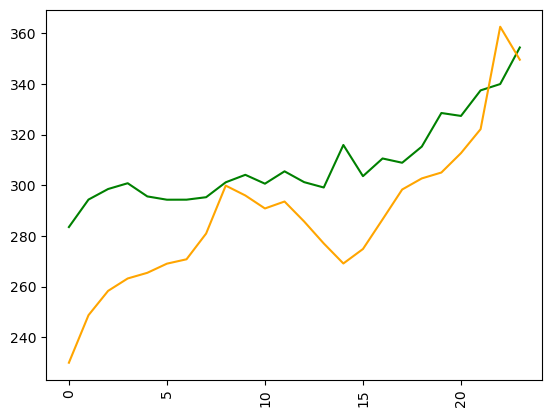

In [9]:
amt = []
amt2 = []


current_time_millis = int(round(time.time() * 1000))
#get median listing prices on zillow for region 34003
result = z_data.find({'RegionName': {"$eq": 34003}}, 
                     {'RegionName': 1, 'MedianListingPricePerSqft_2Bedroom': 1}).sort('Date')
print('elapsed time: ', (int(round(time.time() * 1000))-current_time_millis))

#take dictionary result and build arrays for plotting
for doc in result:
    amt.append(doc['MedianListingPricePerSqft_2Bedroom'])
    
#get median listing price on zillow for region 34003
result2 = z_data.find({'RegionName': {"$eq": 34003}}, 
                     {'RegionName': 1, 'MedianListingPricePerSqft_1Bedroom': 1}).sort('Date')

#take dictionary result and build arrays for plotting
for doc in result2:
    amt2.append(doc['MedianListingPricePerSqft_1Bedroom'])
    
plt.xticks(rotation=90)

plt.plot(amt, linestyle = 'solid', color='green')
plt.plot(amt2, linestyle = 'solid', color='orange')

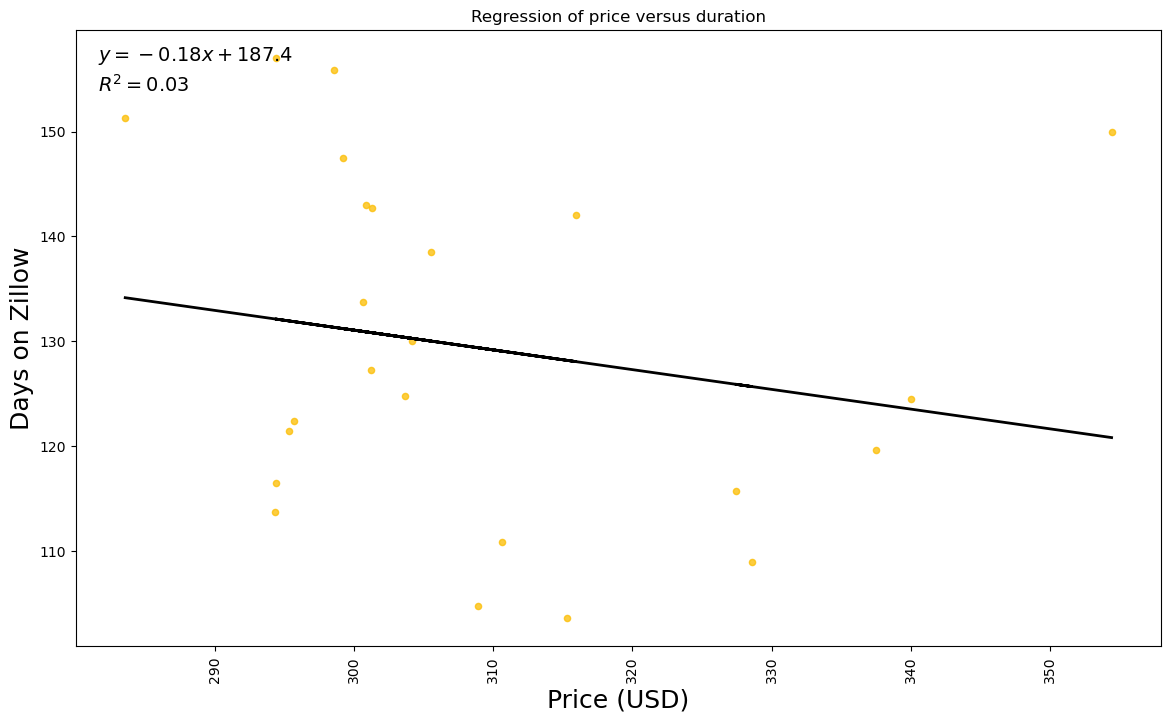

In [10]:
import numpy as np

amt = np.array([])
amt2 = np.array([])

plt.figure(figsize=(14,8))

#get median listing prices on zillow for region 34003
result = z_data.find({'RegionName': {"$eq": 34003}}, 
                     {'RegionName': 1, 'MedianListingPricePerSqft_2Bedroom': 1}).sort('Date')

#take dictionary result and build arrays for plotting
for doc in result:
    if(type(doc['MedianListingPricePerSqft_2Bedroom'])==float):
        amt = np.append(amt, float(doc['MedianListingPricePerSqft_2Bedroom']))
    else:
        amt = np.append(amt, 200000)
    
#get median listing price on zillow for region 34003
result2 = z_data.find({'RegionName': {"$eq": 34003}}, 
                     {'RegionName': 1, 'DaysOnZillow_AllHomes': 1}).sort('Date')

#take dictionary result and build arrays for plotting
for doc in result2:
    if(type(doc['DaysOnZillow_AllHomes'])==float):
        amt2 = np.append(amt2, float(doc['DaysOnZillow_AllHomes']))
    else:
        amt2 = np.append(amt2, 150.0)
    
plt.xticks(rotation=90)

# Plot initial scatterplot with axes labeled 
plt.scatter(amt, amt2, s=20, color='#fcbd00', alpha=0.75)

plt.title("Regression of price versus duration")
plt.xlabel("Price (USD)", fontsize=18)
plt.ylabel("Days on Zillow", fontsize=18)

# Use numpy to do a simple linear fit to time series data 
model = np.polyfit(amt, amt2, 1)
predicted = np.polyval(model, amt)

plt.plot(amt, predicted, linewidth=2, color='black')

slope = model[0]
intercept = model[1]
plt.annotate('$y=%3.5sx+%3.5s$'%(slope, intercept), xy=(0.02, 0.95), xycoords='axes fraction', fontsize=14)

r2 = np.corrcoef(amt, amt2)[0, 1]**2
plt.annotate('$R^2=%3.4s$'%(r2), xy=(0.02, 0.9), xycoords='axes fraction', fontsize=14)

plt.show()


In [53]:
# Example of using BLOBs:

import sys

#store a BLOB:
file = '1_frontal.jpg'  
location = "houses"
path = os.path.join(location, file)
f = open(path, 'rb') # opening a binary file
contents = f.read()
f.close()

print(sys.getsizeof(contents))

#use a BLOB
with open("houses/my_file.jpg", "wb") as binary_file:
   
    # Write bytes to file
    binary_file.write(contents)

122630


In [24]:
client.close()